# 🚀 Capstone Project - Interactive Dashboard

## Project Overview

Welcome to your first capstone project! The goal of this week is to integrate your Pandas data manipulation skills with your new visualization abilities to create a simple, interactive dashboard. We will use **Streamlit** to build the web app and **ngrok** to create a public URL for it, all from within this Google Colab notebook.

This project will challenge you to:
- Use **Markdown cells** for clear documentation.
- Load and prepare a dataset using **Pandas**.
- Build an interactive web application using **Streamlit**.
- Create dashboard components like dropdowns and sliders.
- Display data and plots dynamically based on user input.
- Deploy the app temporarily using **ngrok**.

---

## 🌍 Getting Started

1.  **Open a new Colab notebook.**
2.  **Install Libraries**: We need to install `streamlit` for building the app and `pyngrok` to expose our app to the web.
3.  **Load the Dataset**: We'll use the **Global Land Temperatures by Country** dataset for this project.[link text](https:// [link text](https://))


## 🔧 Project Workflow & Exercises

### Step 1: Install Libraries and Import Dependencies

First, let's get our environment ready by installing the necessary packages and importing our libraries.


In [1]:
# Install Streamlit and pyngrok
!pip install streamlit -q
!pip install pyngrok -q

# Import libraries
import streamlit as st
import pandas as pd
import plotly.express as px
from pyngrok import ngrok
import os
import subprocess
import time

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 39.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 57.9 MB/s eta 0:00:00


### Step 2: Load and Prepare the Data

Now, we'll load the dataset and perform some basic cleaning, similar to our previous exercises.




In [2]:
# Global Land Temperatures by Country

# Load the dataset
url = "https://raw.githubusercontent.com/Steven-Alvarado/Global-Temperature-Analysis/refs/heads/main/GlobalTemperatures.csv"
df = pd.read_csv(url)

# --- Data Cleaning ---
# Convert 'dt' to datetime and extract 'Year'
df['dt'] = pd.to_datetime(df['dt'])
df['Year'] = df['dt'].dt.year

# Handle missing temperatures
df.dropna(subset=['LandAverageTemperature'], inplace=True)
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,Year
0,1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850
1,1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850
2,1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850
3,1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850
4,1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850
...,...,...,...,...,...,...,...,...,...,...
1987,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015
1988,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015
1989,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015
1990,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063,2015


### Step 3: Build the Streamlit App

This is the core of our project. We will use the `%%writefile` magic command to write the Python code for our Streamlit app into a file named `app.py`.

**Exercise 1, 2, 3, & 4**: Your task is to complete the `app.py` file below by filling in the `# Your code here` sections. The comments will guide you on what to do for each exercise.
```python
%%writefile app.py

import streamlit as st
import pandas as pd
import plotly.express as px

# --- Page Configuration ---
st.set_page_config(
    page_title="Global Temperature Dashboard",
    page_icon="🌍",
    layout="wide"
)

# --- Data Loading (Cached) ---
# Use st.cache_data to load data once and cache it
@st.cache_data
def load_data():
    url = "https://raw.githubusercontent.com/Steven-Alvarado/Global-Temperature-Analysis/refs/heads/main/GlobalTemperatures.csv"
    df = pd.read_csv(url)
    df['dt'] = pd.to_datetime(df['dt'])
    df['Year'] = df['dt'].dt.year
    df.dropna(subset=['LandAverageTemperature'], inplace=True)
    return df

df = load_data()

# --- App Title and Description ---
# Exercise 1: Add a title and a markdown description
st.title("Global Temperature Trends Dashboard")
st.markdown("Explore how average land temperatures have changed over time.")


# --- Sidebar for User Input ---
st.sidebar.header("Filters")

# Exercise 2: Create a sidebar with a slider for the Year Range
year_range = st.sidebar.slider(
    "Select Year Range",
    int(df['Year'].min()),
    int(df['Year'].max()),
    (1900, 2015)
)

# --- Filtering Data ---
# Filter data based on sidebar selections
filtered_df = df[
    (df['Year'] >= year_range[0]) &
    (df['Year'] <= year_range[1])
]

# --- Main Page Content ---
st.write(f"## Temperature Trend from {year_range[0]} to {year_range[1]}")

# Group data for plotting
yearly_temp = filtered_df.groupby('Year')['LandAverageTemperature'].mean().reset_index()


# Exercise 3: Display a Plotly line chart
st.write("### Average Temperature Trend")
fig_line = px.line(
    yearly_temp,
    x='Year',
    y='LandAverageTemperature',
    title='Global Average Land Temperature Over Time',
    labels={'Year': 'Year', 'LandAverageTemperature': 'Average Temperature (°C)'}
)
# Add a trendline
fig_line.update_traces(mode='lines+markers')
fig_line.add_scatter(x=yearly_temp['Year'], y=yearly_temp['LandAverageTemperature'].rolling(window=10).mean(), mode='lines', name='10-Year Moving Average')
st.plotly_chart(fig_line, use_container_width=True)


# Exercise 4: Display the filtered DataFrame
st.write("### Raw Data")
with st.expander("Show Filtered Data"):
    st.dataframe(filtered_df)
```

In [3]:
%%writefile app.py

import streamlit as st
import pandas as pd
import plotly.express as px

# --- Page Configuration ---
st.set_page_config(
    page_title="Global Temperature Dashboard",
    page_icon="🌍",
    layout="wide"
)

# --- Data Loading (Cached) ---
# Use st.cache_data to load data once and cache it
@st.cache_data
def load_data():
    url = "https://raw.githubusercontent.com/Steven-Alvarado/Global-Temperature-Analysis/refs/heads/main/GlobalTemperatures.csv"
    df = pd.read_csv(url)
    df['dt'] = pd.to_datetime(df['dt'])
    df['Year'] = df['dt'].dt.year
    df.dropna(subset=['LandAverageTemperature'], inplace=True)
    return df

df = load_data()

# --- App Title and Description ---
# Exercise 1: Add a title and a markdown description
st.title("Global Temperature Trends Dashboard")
st.markdown("Explore how average land temperatures have changed over time.")


# --- Sidebar for User Input ---
st.sidebar.header("Filters")

# Exercise 2: Create a sidebar with a slider for the Year Range
year_range = st.sidebar.slider(
    "Select Year Range",
    int(df['Year'].min()),
    int(df['Year'].max()),
    (1900, 2015)
)

# --- Filtering Data ---
# Filter data based on sidebar selections
filtered_df = df[
    (df['Year'] >= year_range[0]) &
    (df['Year'] <= year_range[1])
]

# --- Main Page Content ---
st.write(f"## Temperature Trend from {year_range[0]} to {year_range[1]}")

# Group data for plotting
yearly_temp = filtered_df.groupby('Year')['LandAverageTemperature'].mean().reset_index()


# Exercise 3: Display a Plotly line chart
st.write("### Average Temperature Trend")
fig_line = px.line(
    yearly_temp,
    x='Year',
    y='LandAverageTemperature',
    title='Global Average Land Temperature Over Time',
    labels={'Year': 'Year', 'LandAverageTemperature': 'Average Temperature (°C)'}
)
# Add a trendline
fig_line.update_traces(mode='lines+markers')
fig_line.add_scatter(x=yearly_temp['Year'], y=yearly_temp['LandAverageTemperature'].rolling(window=10).mean(), mode='lines', name='10-Year Moving Average')
st.plotly_chart(fig_line, use_container_width=True)


# Exercise 4: Display the filtered DataFrame
st.write("### Raw Data")
with st.expander("Show Filtered Data"):
    st.dataframe(filtered_df)

Writing app.py


### Step 4: Set up ngrok and Run the App

Now, we'll expose our app to the internet using `ngrok` and run it. **You will need an ngrok authtoken for this step.**
```python
#@title Set Your ngrok Authtoken and Run App
#@markdown <br>
#@markdown ---
#@markdown **Enter your ngrok authtoken here:**
authtoken = "AUT" #@param {type:"string"}

from IPython.display import display, IFrame

# Set up ngrok tunnel with the provided authtoken
if authtoken:
    try:
        # Kill any existing ngrok tunnels
        ngrok.kill()
        # Set auth token
        ngrok.set_auth_token(authtoken)
        
        # Run the streamlit app as a background process
        process = subprocess.Popen(["streamlit", "run", "app.py"])
        print("Starting Streamlit server in the background...")
        
        # Give the app a moment to start up
        time.sleep(5)
        
        # Open a tunnel to the Streamlit port
        public_url = ngrok.connect(addr='8501')
        print(f"Streamlit App URL: {public_url}")
        print("The dashboard is now running below. It may take a moment to load.")

        # Display the app in an IFrame
        display(IFrame(public_url, width='100%', height=800))

    except Exception as e:
        print(f"An error occurred: {e}")
        print("Please ensure your authtoken is correct and that Streamlit is installed.")
else:
    print("Please enter your ngrok authtoken in the field above to run the app.")
```
1.  Go to the [ngrok Dashboard](https://dashboard.ngrok.com/signup) and sign up for a free account.
2.  Find your authtoken on the [Your Authtoken](https://dashboard.ngrok.com/get-started/your-authtoken) page.
3.  Paste your authtoken into the input field below.

In [8]:
# @title Set Your ngrok Authtoken and Run App
# @markdown <br>
# @markdown ---
# @markdown **Enter your ngrok authtoken here:**

# Note : I put my token and deleted it later.
authtoken = "" #@param {type:"string"}

from IPython.display import display, IFrame

# Set up ngrok tunnel with the provided authtoken
if authtoken:
    try:
        # Kill any existing ngrok tunnels
        ngrok.kill()
        # Set auth token
        ngrok.set_auth_token(authtoken)

        # Run the streamlit app as a background process
        process = subprocess.Popen(["streamlit", "run", "app.py"])
        print("Starting Streamlit server in the background...")

        # Give the app a moment to start up
        time.sleep(5)

        # Open a tunnel to the Streamlit port
        public_url = ngrok.connect(addr='8501')
        print(f"Streamlit App URL: {public_url}")
        print("The dashboard is now running below. It may take a moment to load.")

        # Display the app in an IFrame
        display(IFrame(public_url, width='100%', height=800))

    except Exception as e:
        print(f"An error occurred: {e}")
        print("Please ensure your authtoken is correct and that Streamlit is installed.")
else:
    print("Please enter your ngrok authtoken in the field above to run the app.")

Starting Streamlit server in the background...
Streamlit App URL: NgrokTunnel: "https://endarterial-dalia-subcorymbosely.ngrok-free.dev" -> "http://localhost:8501"
The dashboard is now running below. It may take a moment to load.


In [6]:
from google.colab import files

uploaded = files.upload()

Saving Capture.PNG to Capture.PNG


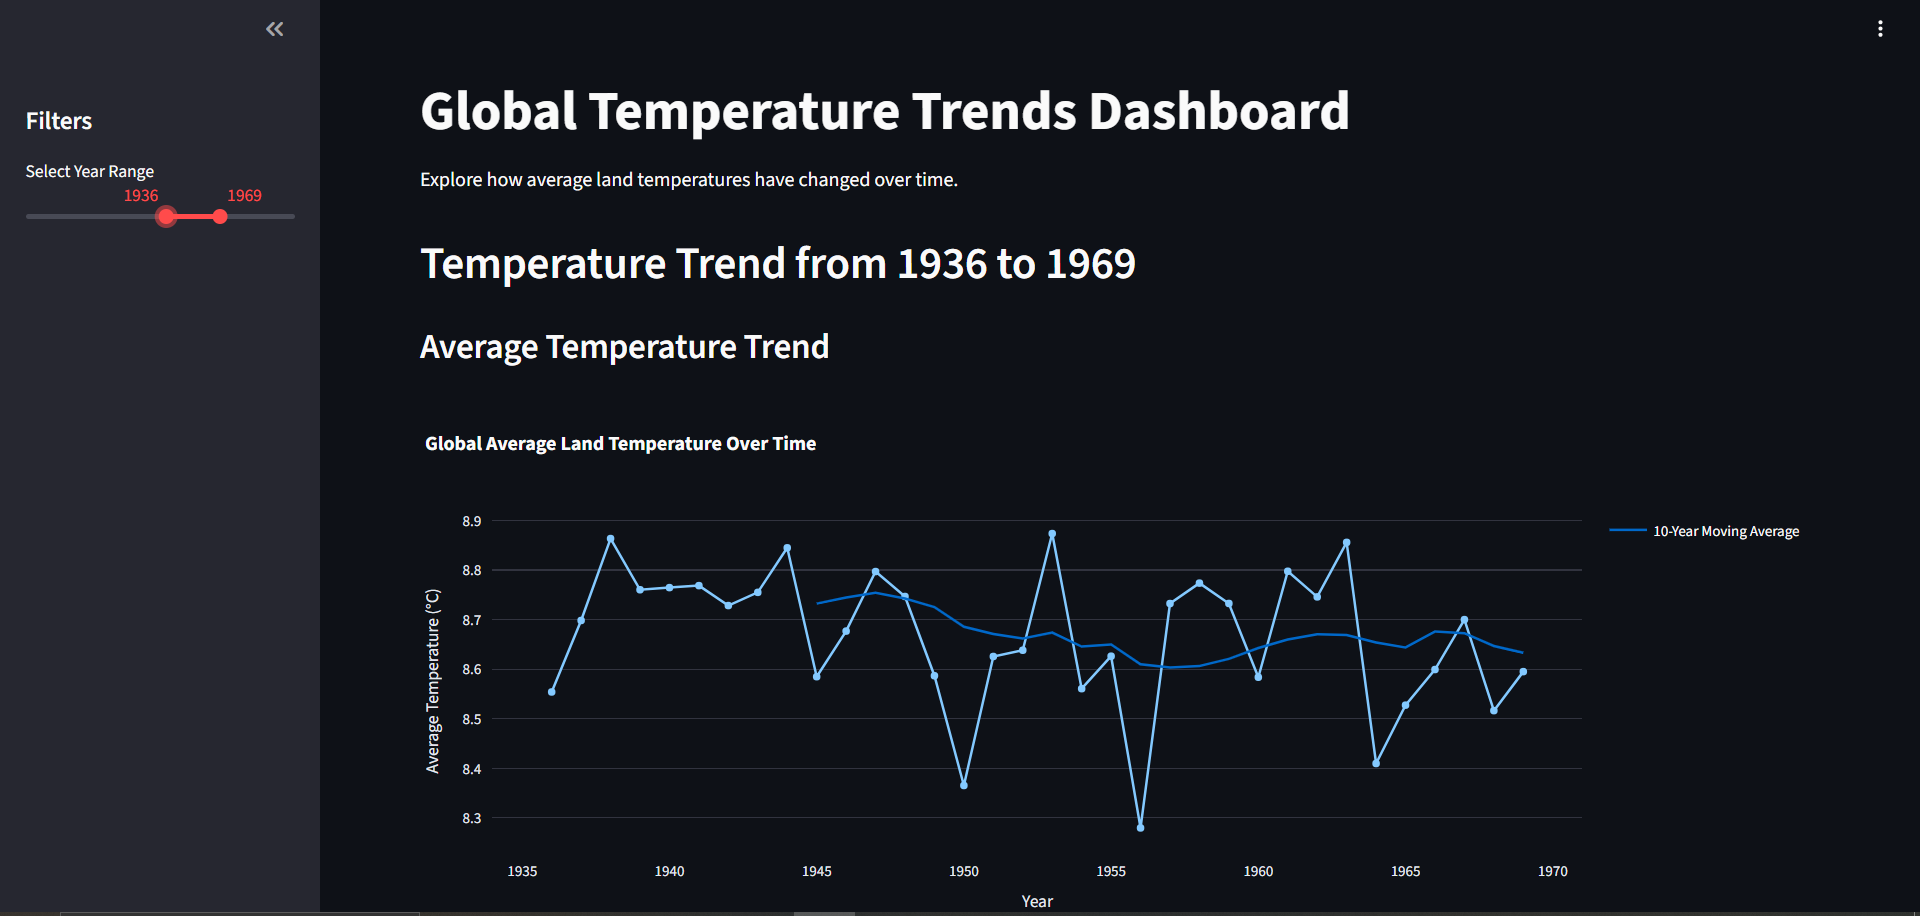

In [7]:
from IPython.display import Image, display

file_name = "Capture.PNG"

display(Image(filename=file_name))

In [5]:
pass